<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/Practise_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключаем окружение R

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("psych")
library(psych)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘tmvnsim’, ‘mnormt’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tmvnsim_1.0-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6052 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

Загрузим и выберем данные

In [ ]:
%%R
library(data.table)
data <-fread("/content/dib_dataset.csv")

In [49]:
%%R

data_analysis <- na.omit(data.frame(Y=data$gdp_per_capita_us_dollars_2017,
                            X1 = data$agricultural_production_index_base_2004_2006_100_2016,
                            X2 = data$food_production_index_base_2004_2006_100_2016,
                            X3 = data$urban_population_percent_2018,
                            X4 = data$sex_ratio_males_per_100_females_2019,
                            X5 = data$population_density_2019,
                            X6 = data$employment_by_industry_industry_male_and_female_2019))

data_analysis_X <- data.frame(X1 = data_analysis$X1,
                            X2 = data_analysis$X2,
                            X3 = data_analysis$X3,
                            X4 = data_analysis$X4,
                            X5 = data_analysis$X5,
                            X6 = data_analysis$X6)

data_analysis_Y <- data.frame(Y=data_analysis$Y)

Произведем анализ собственных значений корреляционной матрицы признаков

Parallel analysis suggests that the number of factors =  NA  and the number of components =  3 


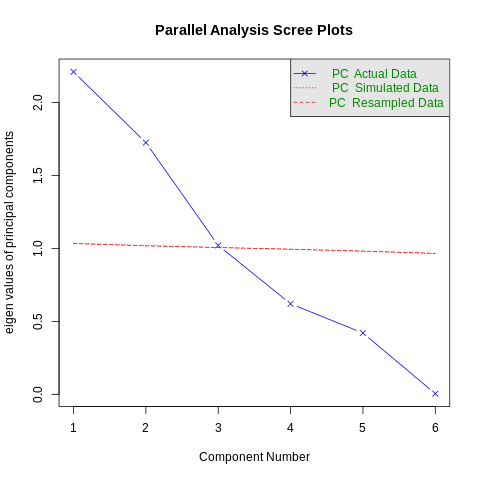

In [50]:
%%R
fa.parallel(data_analysis_X, fa="pc")

Т.к. получено три собственных значения, превышающих единицу, то для анализа главных компонент оставляем ТРИ компоненты

In [51]:
%%R
PC <- principal(data_analysis_X, nfactors=3, rotate="none")

In [52]:
%%R
PC

Principal Components Analysis
Call: principal(r = data_analysis_X, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
     PC1  PC2   PC3   h2    u2 com
X1  0.97 0.08  0.17 0.98 0.023 1.1
X2  0.97 0.08  0.17 0.97 0.026 1.1
X3 -0.42 0.61  0.23 0.59 0.409 2.1
X4  0.25 0.82 -0.02 0.74 0.260 1.2
X5 -0.28 0.14  0.90 0.90 0.096 1.2
X6 -0.09 0.81 -0.33 0.77 0.231 1.4

                       PC1  PC2  PC3
SS loadings           2.21 1.72 1.02
Proportion Var        0.37 0.29 0.17
Cumulative Var        0.37 0.66 0.83
Proportion Explained  0.45 0.35 0.21
Cumulative Proportion 0.45 0.79 1.00

Mean item complexity =  1.3
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.09 
 with the empirical chi square  2328.26  with prob <  NA 
 FALSE
Fit based upon off diagonal values = 0.92

Выделим значения весовых коэффициентов

In [54]:
%%R
unclass(PC$weights)

           PC1        PC2         PC3
X1  0.43936678 0.04778156  0.16380507
X2  0.43871033 0.04598882  0.16287929
X3 -0.18885338 0.35080278  0.22079232
X4  0.11512562 0.47621371 -0.02348546
X5 -0.12797073 0.07866050  0.87951718
X6 -0.04201576 0.46833070 -0.32193322


In [55]:
%%R
as.matrix(unclass(PC$weights)[,1])

          [,1]
X1  0.43936678
X2  0.43871033
X3 -0.18885338
X4  0.11512562
X5 -0.12797073
X6 -0.04201576


In [58]:
%%R
Z1 <- as.matrix(data_analysis_X)%*%as.matrix(unclass(PC$weights)[,1])
Z2 <- as.matrix(data_analysis_X)%*%as.matrix(unclass(PC$weights)[,2])
Z3 <- as.matrix(data_analysis_X)%*%as.matrix(unclass(PC$weights)[,3])

data_analysis_Z <- data.frame(Z1=Z1, Z2=Z2, Z3=Z3)

Задание:

* построить модель множественной линейной регресии на исходном наборе данных (выход - data_analysis_Y, входы - data_analysis_X)

* построить модель множественной линейной регресии на модифицированном наборе данных (выход - data_analysis_Y, входы - data_analysis_Z)

* сравнить модели с помощью информационного критерия Акаике AIC()